In [ ]:
## This block imports the required libraries for the analysis
import yfinance as yf
from arch import arch_model

C:\Users\antti\AppData\Local\Temp\ipykernel_9104\2773575068.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nvidia_data = yf.download("NVDA", start="2018-01-01", end="2025-08-15")
[*********************100%***********************]  1 of 1 completed


<Axes: title={'center': 'Daily returns'}, xlabel='Date'>

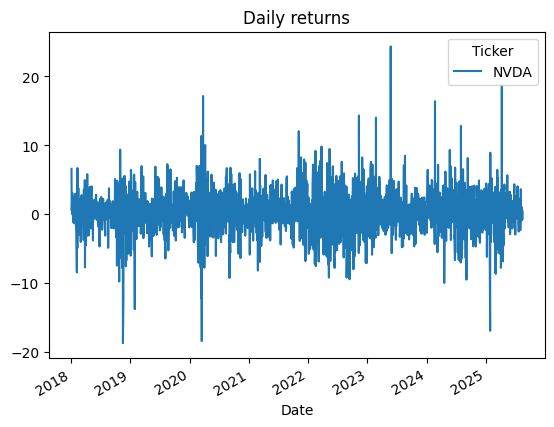

In [29]:
## This section gets the stock data and transforms it into the format needed for the model
## The ARCH model requires returns data, not raw prices

nvidia_data = yf.download("NVDA", start="2018-01-01", end="2025-08-15")
nvidia_close = nvidia_data["Close"].dropna()
nvidia_returns = 100 * nvidia_close.pct_change().dropna()
nvidia_returns.plot(title="Daily returns")

In [ ]:
## Volatility Clustering: This is the most important pattern to observe in this chart. 
## We can clearly see that periods of high volatility are followed by more high volatility, and periods of low volatility are followed by more low volatility.

## High Volatility: The "spikes" and large fluctuations (both positive and negative) tend to happen in clusters. 
## Notable periods of high volatility are visible around early 2020 (likely related to the initial COVID-19 market panic), and again in 2022-2023.

## Low Volatility: The periods where the line stays closer to zero and is less "spiky" indicate lower volatility, 
## meaning the price is not fluctuating as much.

In [31]:
am = arch_model(nvidia_returns, p=1, q=1, o=1)
res = am.fit(update_freq=5, disp="off")
print(res.summary())

## arch_model(...) sets up the model, taking stock returns data and specifying the model type as ARCH(1,1), which is a standard model for volatility.

## am.fit(...) runs the calculations to find the model's best fit parameters based on your data.

## print(res.summary()) displays the results, showing key statistics like coefficients, standard errors, and p-values, which help understand the model's performance.

                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                   NVDA   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -4858.45
Distribution:                  Normal   AIC:                           9726.90
Method:            Maximum Likelihood   BIC:                           9754.68
                                        No. Observations:                 1914
Date:                Sun, Aug 24 2025   Df Residuals:                     1913
Time:                        16:33:53   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.2681  6.939e-02      3.863  1.118e-04 [  0.132,  0.40

In [ ]:
## The most important takeaways:

## Persistence of Volatility: The high and significant beta[1] value confirms that volatility is not random; 
## periods of high volatility are likely to be followed by more high volatility.

## The Leverage Effect: The significant gamma[1] value provides statistical evidence that negative news (price drops)
##  has a larger impact on future volatility than positive news. This is a critical factor to include for more accurate options valuation.

## Model Validation: The significance of your coefficients (especially gamma[1] and beta[1]) suggests that the GJR-GARCH model is a
##  very good fit for this data, far superior to a simple historical volatility calculation.

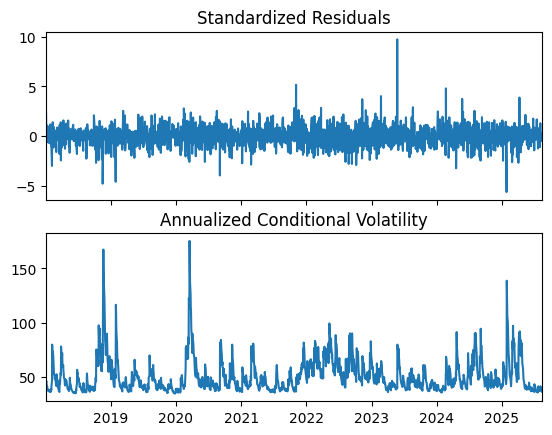

In [33]:
## This section visualizes the model's output.
fig = res.plot(annualize="D")

In [ ]:
## The bottom chart shows our model's estimate of volatility over time. 
## We can see how it correctly captures the periods of high volatility, such as during the 2020 market crash.
 
## The top chart, the standardized residuals, confirms that after accounting for the volatility, 
## the remaining 'noise' is random and has no pattern, which means the model has successfully captured the volatility dynamics needed for our options valuation.